# K-means Clustering From Scratch In Python


## Introduction

In this notebook, we will implement the K-means clustering algorithm from scratch in Python. We will use the Iris dataset to test our implementation. The Iris dataset is a multivariate dataset with 3 classes and 4 features. The dataset is available in the scikit-learn library. We will use the K-means algorithm to cluster the data into 3 clusters. We will then compare the results with the actual labels of the data.



In [1]:
# import the packages

import numpy as np
import pandas as pd

In [63]:
#  import the data into a pandas dataframe
players = pd.read_csv('./data/K-means_Clustering_From_Scratch_In_Python/players_22.csv')

# list the features we want to use
features = ["overall", "potential", "value_eur", "wage_eur", "age"]

# drop the rows with missing values
players = players[features].dropna(subset=features)

#  copy a small subset of the data to a new dataframe
data = players[features].copy()

data.head()

/var/folders/dy/h36wnkx57lg495q84yjtvm100000gn/T/ipykernel_75046/2843111669.py:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('./data/K-means_Clustering_From_Scratch_In_Python/players_22.csv')


,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30


Steps that are needed to implement the K-means algorithm:

1. Scale the data to a a range of 1 to 10
2. Initialize random centroids
3. Assign each data point to the closest centroid
4. Update the centroids
5. Repeat steps 3 and 4 until the centroids converge (stop changing)

In [10]:
# scale the data: transforming your data so that it fits within a specific scale
# min max scaling
# (data - data.min()) - sets the minimum value to 0
# (data.max() - data.min() - sets the maximum value to 1
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [53]:
# initialize the random centroids
# look through the data and pick k random rows
# turn it into a float

def random_centriod(data, k):
    centriods = []
    for i in range(k):
        centriod = data.apply(lambda x: float(x.sample()))
        centriods.append(centriod)
    return pd.concat(centriods, axis=1)

In [54]:
#  Assign each data point to the closest centroid (cluster)
#  subtract the values from the centriod from each data point
#  square the result (each difference)
#  sum the squared differences
#  take the square root of the sum

def get_labels(data, centriods):
    distances = centriods.apply(lambda x : np.sqrt(((data - x) **2 ).sum(axis=1)))
    return distances.idxmin(axis=1)
    

In [55]:
# get the geometric mean of each cluster
# usually you would
#   multiply the values in each cluster together
#   take the nth root of the product

# we will
#   data.groupby(labels) - group the data by the labels
#   take the natural log of each value
#   take the mean of the logs
#   take the exponential of the mean

def new_centriods(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
     

In [56]:
# visualize the clusters assignments at each iterations
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [57]:
def plot_clusters(data, labels, centriods, iteration):
    # turn 5d data into 2d data - PCA
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centriods_2d = pca.transform(centriods.T)
    
    # clear the output - IPython
    clear_output(wait=True)
    
    # plot the data - matplotlib
    plt.title("Iteration: " + str(iteration))
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centriods_2d[:,0], y=centriods_2d[:,1])
    plt.show()

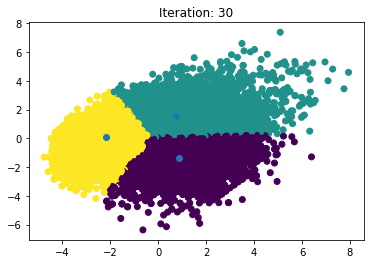

In [58]:
max_iterations = 100
k = 3

centriods = random_centriod(data, k)
old_centriods = pd.DataFrame()
iteration = 1


# stop the loop when the centriods stop changing
while iteration < max_iterations and not centriods.equals(old_centriods):
    old_centriods = centriods
    labels = get_labels(data, centriods)
    centriods = new_centriods(data, labels, k)
    plot_clusters(data, labels, centriods, iteration)
    iteration += 1

In [60]:
centriods

,0,1,2
overall,4.784633,5.806043,3.206838
potential,4.506962,6.497993,4.928473
value_eur,1.044980,1.285501,1.026614
wage_eur,1.118904,1.420001,1.028505
age,5.472247,3.596161,2.518708


In [61]:
#  compare to sklearn
from sklearn.cluster import KMeans

In [62]:
kmens = KMeans(n_clusters=3)
kmens.fit(data)
centriods_2 = kmens.cluster_centers_
pd.DataFrame(centriods_2, columns=features).T

,0,1,2
overall,6.210533,4.802146,3.582350
potential,6.612225,4.506232,5.197414
value_eur,1.408261,1.040073,1.035194
wage_eur,1.647676,1.113039,1.039189
age,4.122181,5.607855,2.705190
